# Big Mart Sales

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("train.csv")

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis. Data Exploration and Preparation

1. Variable identification
2. Univariate analysis
3. Bi-variate analysis
4. Missing values treatment
5. Outlier treatment
6. Variable transformation
7. Variable creation

### 1. Variable Identification

1. Identify predictor and target variables;
2. Identify data type of the variables;
3. Identify category of the variables.

In [6]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

#### 1. Identify predictor and target variables.

**Predictor variables.**

* Item_Weight
* Item_Fat_Content
* Item_Visibility
* Item_Type
* Item_MRP
* Outlet_Establishment_Year
* Outlet_Size
* Outlet_Location_Type
* Outlet_Type

**Target variable.**

* Item_Outlet_Sales

#### 2. Identify data type of the variables.

**Character.**

* Item_Fat_Content
* Item_Type
* Outlet_Size
* Outlet_Location_Type
* Outlet_Type

**Numeric.**

* Item_Weight
* Item_Visibility
* Item_MRP
* Outlet_Establishment_Year
* Item_Outlet_Sales

#### 3. Identify categories of the variables.

**Categorical.**

* Item_Fat_Content
* Item_Type
* Outlet_Establishment_Year
* Outlet_Size
* Outlet_Location_Type
* Outlet_Type

**Continuous.**

* Item_Weight
* Item_Visibility
* Item_MRP
* Item_Outlet_Sales

### 2. Univariate Analysis

In [9]:
continuous_variables = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
categorical_variables = ['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size', 
                         'Outlet_Location_Type', 'Outlet_Type']

#### Continuous variables

In [10]:
train[continuous_variables].describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


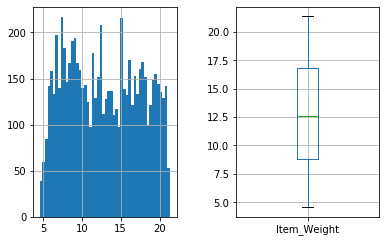

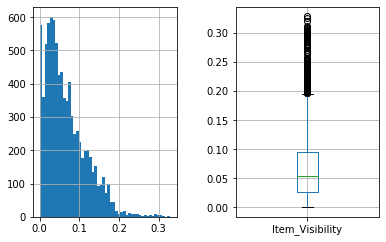

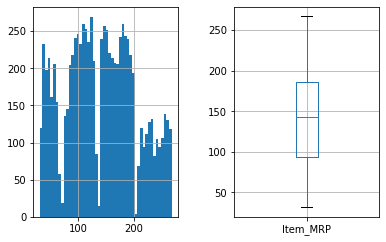

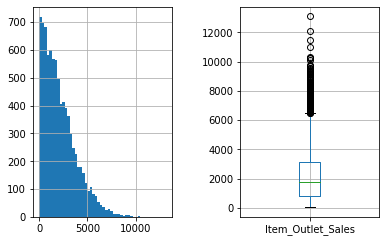

In [13]:
for continuous in continuous_variables: 
    plt.subplot(1, 2, 1);
    train[continuous].hist(bins=50);
    plt.subplot(1, 2, 2);
    train.boxplot(column=[continuous]);
    plt.tight_layout(pad=3.0)
    plt.show()

#### Categorical Variables

In [14]:
def analyze_categorical(variable, df):
    counts = pd.concat((df[variable].value_counts(), df[variable].value_counts(normalize=True)), 
              axis=1, keys=('Counts', 'Percentage'))
    print(counts)
    df[variable].value_counts().plot.bar()
    plt.show()

      Counts  Percentage
1985    1463    0.171653
1987     932    0.109351
1999     930    0.109117
1997     930    0.109117
2004     930    0.109117
2002     929    0.108999
2009     928    0.108882
2007     926    0.108647
1998     555    0.065118


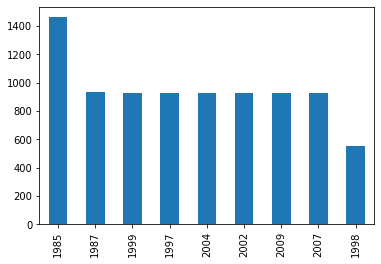

In [15]:
analyze_categorical('Outlet_Establishment_Year', train)

For Item_Fat_Content
         Counts  Percentage
Low Fat    5089    0.597090
Regular    2889    0.338965
LF          316    0.037076
reg         117    0.013728
low fat     112    0.013141


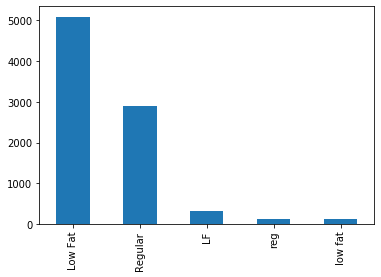

For Item_Type
                       Counts  Percentage
Fruits and Vegetables    1232    0.144550
Snack Foods              1200    0.140795
Household                 910    0.106770
Frozen Foods              856    0.100434
Dairy                     682    0.080019
Canned                    649    0.076147
Baking Goods              648    0.076030
Health and Hygiene        520    0.061011
Soft Drinks               445    0.052212
Meat                      425    0.049865
Breads                    251    0.029450
Hard Drinks               214    0.025109
Others                    169    0.019829
Starchy Foods             148    0.017365
Breakfast                 110    0.012906
Seafood                    64    0.007509


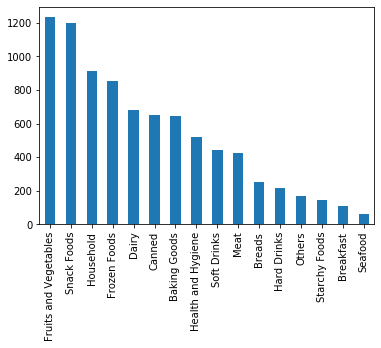

For Outlet_Establishment_Year
      Counts  Percentage
1985    1463    0.171653
1987     932    0.109351
1999     930    0.109117
1997     930    0.109117
2004     930    0.109117
2002     929    0.108999
2009     928    0.108882
2007     926    0.108647
1998     555    0.065118


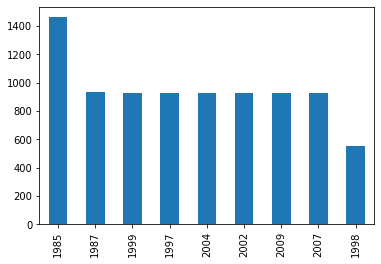

For Outlet_Size
        Counts  Percentage
Medium    2793    0.456895
Small     2388    0.390643
High       932    0.152462


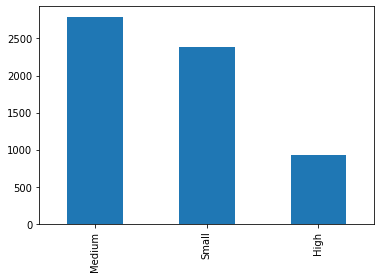

For Outlet_Location_Type
        Counts  Percentage
Tier 3    3350    0.393054
Tier 2    2785    0.326763
Tier 1    2388    0.280183


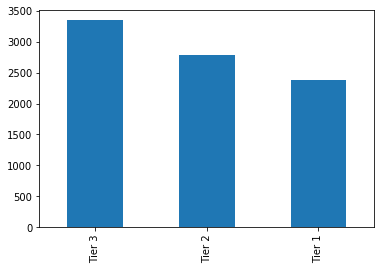

For Outlet_Type
                   Counts  Percentage
Supermarket Type1    5577    0.654347
Grocery Store        1083    0.127068
Supermarket Type3     935    0.109703
Supermarket Type2     928    0.108882


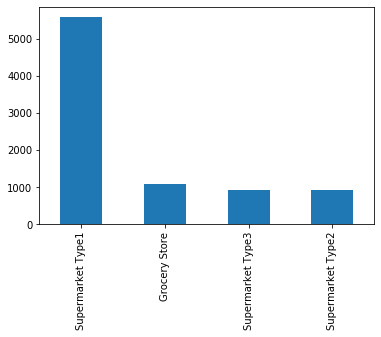

In [16]:
for variable in categorical_variables:
    print(f'For {variable}')
    analyze_categorical(variable, train)

As we can observe from the frequency table for the variable Item_Fat_Content, we only have two categories: low fat and regular. We have to standardize the names.